In [45]:
# import library
import pandas as pd

# import ML library
from sklearn.ensemble import AdaBoostClassifier, BaggingClassifier, GradientBoostingClassifier, RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier


# import evaluation metrics
from sklearn.metrics import classification_report, accuracy_score

import warnings
warnings.filterwarnings('ignore')

In [34]:
df = pd.read_csv("https://raw.githubusercontent.com/densaiko/data_science_learning/main/dataset/Human%20Capital.csv")
display(df.shape)
df.head()

(54808, 13)

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,awards_won,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,0,49.0,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,60.0,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,50.0,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,50.0,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,73.0,0


In [35]:
df.shape


(54808, 13)

In [36]:
df.dtypes

employee_id               int64
department               object
region                   object
education                object
gender                   object
recruitment_channel      object
no_of_trainings           int64
age                       int64
previous_year_rating    float64
length_of_service         int64
awards_won                int64
avg_training_score      float64
is_promoted               int64
dtype: object

In [37]:
# target variable (is_promoted)
df['is_promoted'].value_counts(normalize=True)

0    0.91483
1    0.08517
Name: is_promoted, dtype: float64

In [38]:
df.columns

Index(['employee_id', 'department', 'region', 'education', 'gender',
       'recruitment_channel', 'no_of_trainings', 'age', 'previous_year_rating',
       'length_of_service', 'awards_won', 'avg_training_score', 'is_promoted'],
      dtype='object')

In [39]:
a = df[['department', 'education', 'gender',
       'recruitment_channel', 'no_of_trainings', 'age', 'previous_year_rating',
       'length_of_service', 'awards_won', 'avg_training_score', 'is_promoted']]

In [41]:
data_encoded = pd.get_dummies(a, prefix_sep="_")
data_encoded = data_encoded.dropna()
display(data_encoded.shape)
data_encoded.head()

(48326, 24)

,no_of_trainings,age,previous_year_rating,length_of_service,awards_won,avg_training_score,is_promoted,department_Analytics,department_Finance,department_HR,department_Legal,department_Operations,department_Procurement,department_R&D,department_Sales & Marketing,department_Technology,education_Bachelor's,education_Below Secondary,education_Master's & above,gender_f,gender_m,recruitment_channel_other,recruitment_channel_referred,recruitment_channel_sourcing
0,1,35,5.0,8,0,49.0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,1
1,1,30,5.0,4,0,60.0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,1,0,0
2,1,34,3.0,7,0,50.0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,1
3,2,39,1.0,10,0,50.0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,1,0,0
4,1,45,3.0,2,0,73.0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,1,0,0


In [49]:
data_encoded.columns

Index(['no_of_trainings', 'age', 'previous_year_rating', 'length_of_service',
       'awards_won', 'avg_training_score', 'is_promoted',
       'department_Analytics', 'department_Finance', 'department_HR',
       'department_Legal', 'department_Operations', 'department_Procurement',
       'department_R&D', 'department_Sales & Marketing',
       'department_Technology', 'education_Bachelor's',
       'education_Below Secondary', 'education_Master's & above', 'gender_f',
       'gender_m', 'recruitment_channel_other', 'recruitment_channel_referred',
       'recruitment_channel_sourcing'],
      dtype='object')

In [51]:
dtrain = data_encoded[['no_of_trainings', 'age', 'previous_year_rating', 
                      'length_of_service',
                      'awards_won', 'avg_training_score', 'is_promoted',
                      'department_Analytics', 'department_Finance', 
                      'department_HR',
                      'department_Legal', 'department_Operations', 
                      'department_Procurement',
                      'department_R&D', 'department_Sales & Marketing',
                      'department_Technology', "education_Bachelor's",
                      'education_Below Secondary', "education_Master's & above", 
                      'gender_f','gender_m', 'recruitment_channel_other', 
                      'recruitment_channel_referred',
                      'recruitment_channel_sourcing']].copy()
dtrain.head()

,no_of_trainings,age,previous_year_rating,length_of_service,awards_won,avg_training_score,is_promoted,department_Analytics,department_Finance,department_HR,department_Legal,department_Operations,department_Procurement,department_R&D,department_Sales & Marketing,department_Technology,education_Bachelor's,education_Below Secondary,education_Master's & above,gender_f,gender_m,recruitment_channel_other,recruitment_channel_referred,recruitment_channel_sourcing
0,1,35,5.0,8,0,49.0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,1
1,1,30,5.0,4,0,60.0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,1,0,0
2,1,34,3.0,7,0,50.0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,1
3,2,39,1.0,10,0,50.0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,1,0,0
4,1,45,3.0,2,0,73.0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,1,0,0


In [52]:
dtrain_x = dtrain[['no_of_trainings', 'age', 'previous_year_rating', 
                      'length_of_service',
                      'awards_won', 'avg_training_score',
                      'department_Analytics', 'department_Finance', 
                      'department_HR',
                      'department_Legal', 'department_Operations', 
                      'department_Procurement',
                      'department_R&D', 'department_Sales & Marketing',
                      'department_Technology', "education_Bachelor's",
                      'education_Below Secondary', "education_Master's & above", 
                      'gender_f','gender_m', 'recruitment_channel_other', 
                      'recruitment_channel_referred',
                      'recruitment_channel_sourcing']]
dtrain_y = dtrain['is_promoted']
dtrain_y.head()

0    0
1    0
2    0
3    0
4    0
Name: is_promoted, dtype: int64

In [54]:
x_train, x_test, y_train, y_test = train_test_split(dtrain_x, dtrain_y, test_size=0.2, random_state=43)


In [55]:
dt_model = DecisionTreeClassifier(criterion = 'entropy' )


In [56]:
models = [RandomForestClassifier(), 
          AdaBoostClassifier(), 
          AdaBoostClassifier(base_estimator=dt_model),
          BaggingClassifier(), 
          GradientBoostingClassifier()]

In [57]:
for model in models:
    model.fit(x_train,y_train)
    print(f"{model} : Results\n")
    print(f"Accuracy score for Train data: {model.score(x_train , y_train)}")
    test_pred = model.predict(x_test)
    print(f"Accuracy Score for Test data: {accuracy_score(y_test, test_pred)}\n")
    print(f"Classification report \n {classification_report(y_test,test_pred)}\n")

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False) : Results

Accuracy score for Train data: 0.9952146921883084
Accuracy Score for Test data: 0.9333747154976205

Classification report 
               precision    recall  f1-score   support

           0       0.94      0.99      0.96      8812
           1       0.77      0.35      0.48       854

    accuracy                           0.93      9666
   macro avg       0.85      0.67      0.72      9666
weighted avg       0.93      0.93      0.92   

In [59]:
n_estimators=[60,70,80,90,100,110,120,130,140,150]
for i in n_estimators:
    model = GradientBoostingClassifier(n_estimators=i, random_state=1)
    model.fit(x_train,y_train)
    print(f"{model} no of estimators:{i} : Results\n")
    print(f"Accuracy score for Train data: {model.score(x_train , y_train)}")
    test_pred = model.predict(x_test)
    print(f"Accuracy Score for Test data: {accuracy_score(y_test, test_pred)}\n")
    print(model.score(x_train , y_train) - accuracy_score(y_test, test_pred) )

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=60,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=1, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False) no of estimators:60 : Results

Accuracy score for Train data: 0.9401448525607864
Accuracy Score for Test data: 0.9383405752120836

0.0018042773487028096
GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,

In [60]:
model = GradientBoostingClassifier(n_estimators=60, random_state=1)
model.fit(x_train,y_train)
print(f"{model} no of estimators:{120} : Results\n")
print(f"Accuracy score for Train data: {model.score(x_train , y_train)}")
test_pred = model.predict(x_test)
print(f"Accuracy Score for Test data: {accuracy_score(y_test, test_pred)}\n")

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=60,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=1, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False) no of estimators:120 : Results

Accuracy score for Train data: 0.9401448525607864
Accuracy Score for Test data: 0.9383405752120836



In [61]:
print(classification_report(y_test, test_pred))

              precision    recall  f1-score   support

           0       0.94      1.00      0.97      8812
           1       0.97      0.31      0.47       854

    accuracy                           0.94      9666
   macro avg       0.95      0.66      0.72      9666
weighted avg       0.94      0.94      0.92      9666



In [65]:
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix

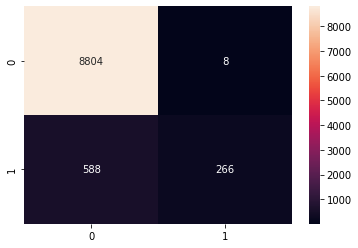

In [66]:
sns.heatmap(confusion_matrix(y_test, test_pred), annot=True, fmt='2d')